![logo](https://imaging.epfl.ch/resources/logo-for-gitlab.svg)

<h1>Imaging Lunch: Introduction to Python for Image Analysis</h1>

This notebook introduces the basics of image handling and manipulation in Python, using <a href="https://scikit-image.org/">Scikit-image</a>, <a href="https://matplotlib.org/stable/">Matplotlib</a>, and <a href="https://numpy.org/">Numpy</a>.

➡️ <a href="https://github.com/EPFL-Center-for-Imaging/ImagingLunch_ImagesInPython">Git repository</a>.

```{admonition} How to use this notebook?
This document is an interactive <a href="https://jupyter.org/">Jupyter notebook</a>. Use `Shift`+`Enter` to run individual code cells.
```

## Why use Python for image analysis?

- ✅ Easy to learn and use
- ✅ Free & open-source
- ✅ Wide range of libraries
- ✅ Implement custom functions & tools
- ✅ Automate image analysis via scripts
- ✅ Deep learning & data science
- ✅ Explore data in Juptyer notebooks

## Contents

We'll cover the following topics:

- <a href="#opening-our-first-image">Opening our first image</a>
- <a href="#how-are-digital-images-represented-in-python">How are digital images represented in Python?</a>
- <a href="#selecting-and-modifying-pixel-values">Selecting and modifying pixel values</a>
- <a href="#opening-images-from-files">Opening images from files</a>
- <a href="#applying-image-processing-filters">Applying image processing filters</a>
- <a href="#thresholding">Thresholding</a>
- <a href="#analyzing-individual-objects">Analyzing individual objects</a>

## Packages

We'll use the packages listed in the requirements file ([requirements.txt](./requirements.txt)). To make sure you have installed these packages, you can run the Jupyter "magic" command below:

In [ ]:
%pip install -qr requirements.txt

## Imports

We start by importing the `data` module from Scikit-image, which provides example images, and Matplotlib's `pyplot` module which we'll use to display images.

In [1]:
from skimage import data
import matplotlib.pyplot as plt

## Opening our first image

Let's load an example image provided by Scikit-image's `data` module. We'll display it using Matplotlib's `imshow` function.

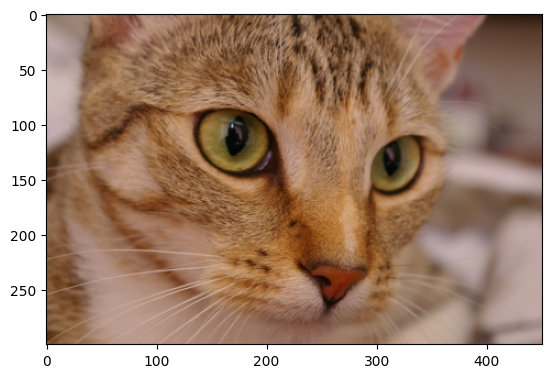

In [36]:
image = data.chelsea()

plt.imshow(image);

## How are digital images represented in Python?

Let's print the `type` of our image variable.

In [37]:
type(image)

numpy.ndarray

We've managed to read the image into a **Numpy array**. Numpy arrays sit at the foundation of the scientific Python ecosystem, and are also the most common way of representing images in Python.

Our image is really just an array of numbers:

In [38]:
image

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]

We can inspect the array's **attributes**, such as its `dtype` (data type), which tells us what kind of numbers are stored in the image array:

In [39]:
image.dtype

dtype('uint8')

Common types include **integers** such as 8-bit unsigned (`uint8`) used to store integer values between 0 and 255. There are also **floating-point** types (`float32`, `float64`) that store arrays of decimal numbers. Arrays encoded in a higher number of bits (32, 64) take up more space in memory, but allow to store larger numbers and to perform certain computations with more precision.

Next, we can examine the image's `shape` attribute, which gives us the size of the pixel grid:

In [40]:
image.shape

(300, 451, 3)

In this case, we have loaded an image of 300 x 451 pixels, which also contains three color channels (RGB).

We can display the color channels separately. Below, we create a `Figure` object with subplots for the red, green and blue channels, respectively:

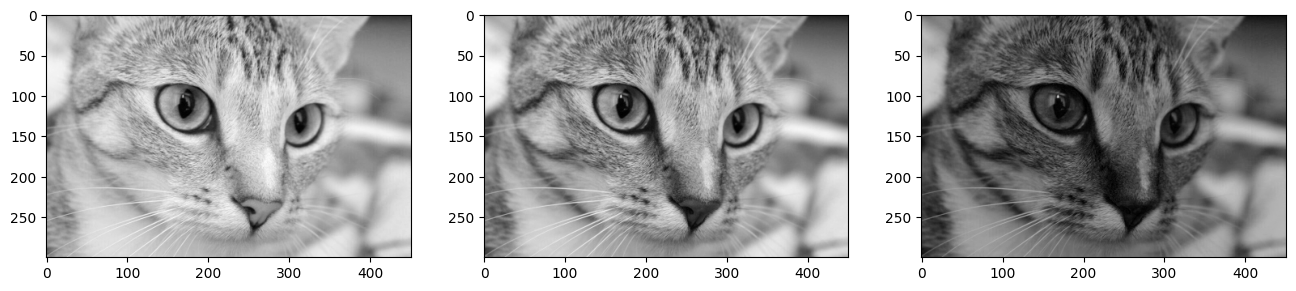

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16, 8), ncols=3)
ax1.imshow(image[..., 0], cmap="gray")
ax2.imshow(image[..., 1], cmap="gray")
ax3.imshow(image[..., 2], cmap="gray")
plt.show()

Or convert the image to grayscale:

float64
(300, 451)


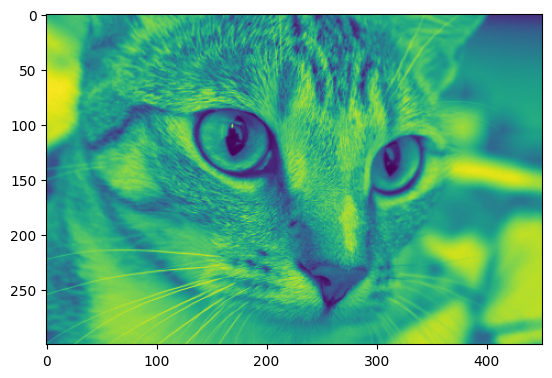

In [11]:
from skimage.color import rgb2gray

gray_image = rgb2gray(image)

plt.imshow(gray_image);

print(gray_image.dtype)
print(gray_image.shape)

By default, Matplotlib uses the `viridis` **colormap** to display images. We can change the colormap by specifying a value for the `cmap` parameter of the `imshow` function (<a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html">docs</a>).

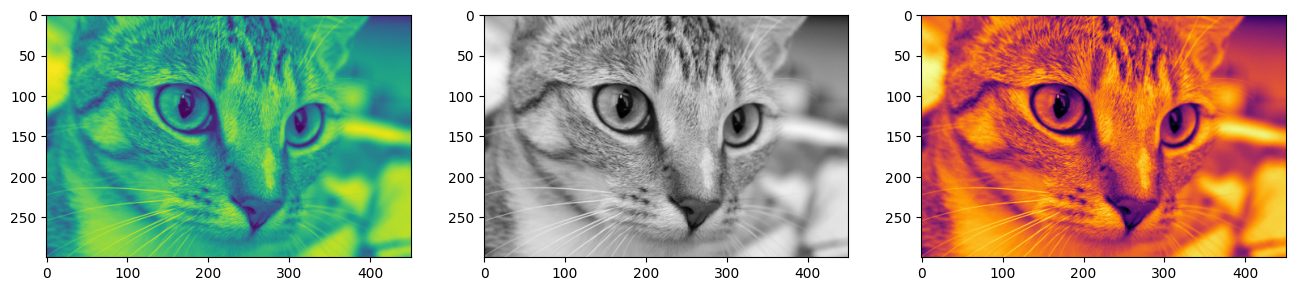

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16, 8), ncols=3)
ax1.imshow(gray_image, cmap="viridis")
ax2.imshow(gray_image, cmap="gray")
ax3.imshow(gray_image, cmap="inferno")
plt.show()

If we want to use the "gray" colormap by default instead of "viridis", we can set:

In [13]:
import matplotlib

matplotlib.rc("image", cmap="gray")

Finally, we can add a color bar to display the range of pixel values, and set the minimum and maximum values of the colorbar with the `vmin` and `vmax` parameters.

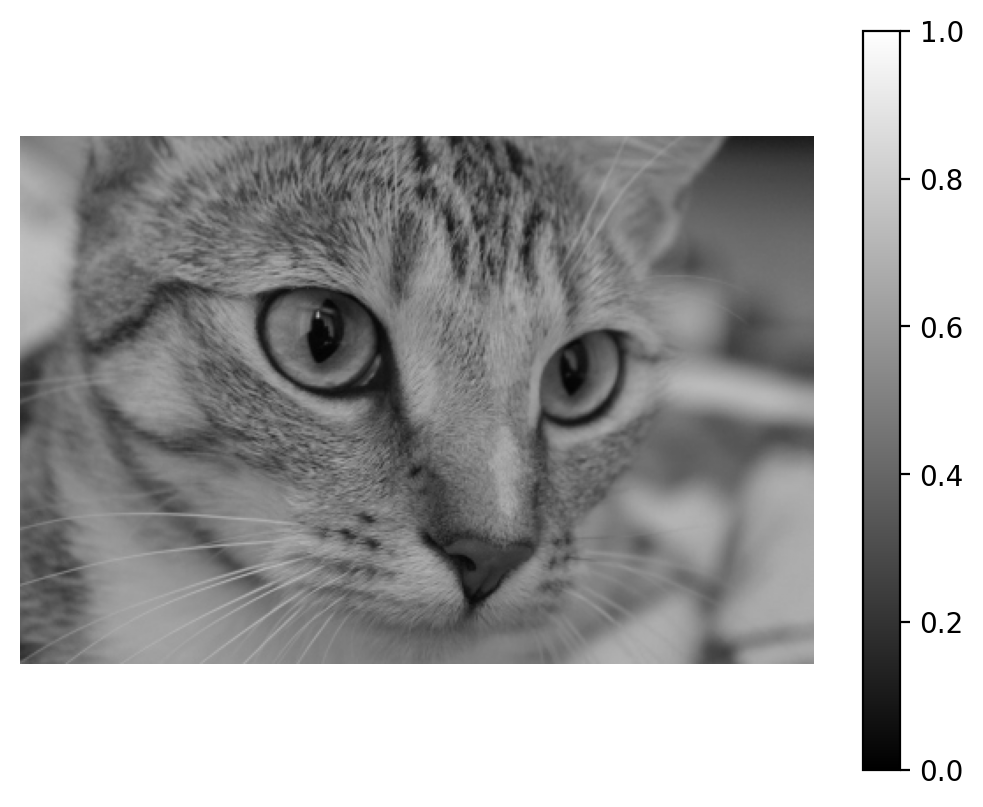

In [14]:
fig, ax = plt.subplots(dpi=200)
im = ax.imshow(gray_image, vmin=0, vmax=1)
ax.set_axis_off()  # Hide the axes
fig.colorbar(im)
plt.show()

```{note} Beyond Matplotlib
Matplotlib is suitable for many simple visualization cases. However, other visualization libraries exist in Python. For example:

- <a href="https://napari.org/">Napari</a>
- <a href="https://plotly.com/python/imshow/">Plotly</a>
- <a href="https://github.com/haesleinhuepf/stackview?tab=readme-ov-file">Stackview</a>
```

## Selecting and modifying pixel values

Since images are just Numpy arrays, we can apply any array operations to them. To select a subset of pixels in a region of interest in the image, we can use Numpy **indexing** along each axis, using the syntax `a[start:stop:step]`

In the example below, we "crop" the image along X and Y using this technique:

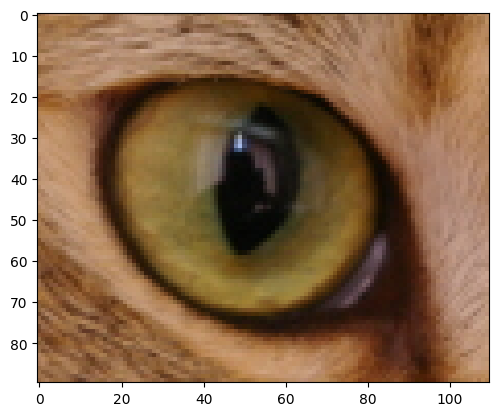

In [15]:
crop = image[70:160, 120:230]

plt.imshow(crop);

Similarly, we can select and change pixel values in our image. For example:

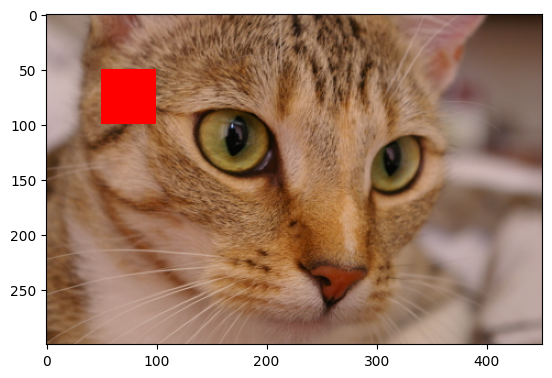

In [16]:
image[50:100, 50:100] = [255, 0, 0]

plt.imshow(image);

```{note} Image coordinates
The origin of the image coordinates is in the top-left corner of the image. To remember this, we can imagine the image as a table of values, where the first axis corresponds to rows and the second axis to columns of pixels.

![coordinates](./assets/image-coordinates.png)
```

## Opening images from files

To work with real scientific images in Python, the first step is usually to open them from files and load the image data into memory as Numpy arrays.

To do this, we need to use a library that can recognize the file format that we are dealing with. For common file formats (e.g. TIFF) we can use the `imread` function from Scikit-image.

Image shape:  (722, 1037)
Data type:  uint8
Min value:  29
Max value:  255


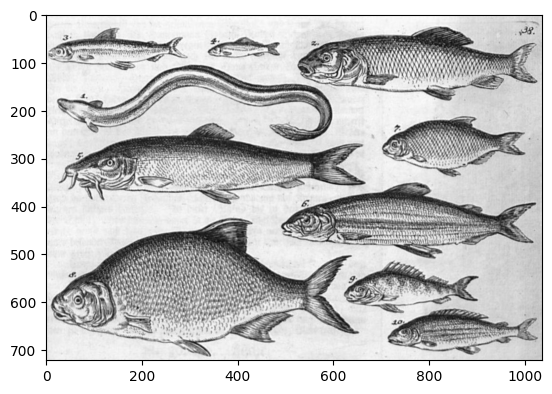

In [43]:
import skimage.io

# Image source: VIATICALPES (https://catima.unil.ch/viatimages/en)
image = skimage.io.imread("limat_fish.tif")

plt.imshow(image);

print("Image shape: ", image.shape)
print("Data type: ", image.dtype)
print("Min value: ", image.min())
print("Max value: ", image.max())

```{note} Image formats
To open certain specific formats (e.g. microscopy or astronomy data formats), we may need to install and use dedicated libraries.

Below are a few examples.

| Files             | Examples                        | Library |
|-------------------|---------------------------------| ------ |
| Common formats | `.tif`, `.png`, `.jpg` | `scikit-image`, `Pillow`, `tifffile`, `OpenCV` |
| Biological formats  |  `.czi`, `.lif`, `.ome.tiff` | `bioio` |
| Specific formats  | `.mrc`, `.hdf5`, `.fits` | `mrcfile`, `h5py`, `fitsio` |
```

Once again, we have loaded our image into a Numpy array. Notice that this is a grayscale image, with a size of 722 x 1037 pixels.

## Applying image processing filters

Image processing filters are operations applied to the whole image, for example to remove noise, sharpen details, detect edges, or rescale the image intensity values.

The scikit-image <a href="https://scikit-image.org/docs/0.25.x/api/skimage.filters.html">filters</a> module offers a wide range of image processing filters to choose from. For example, to apply a Gaussian filter:

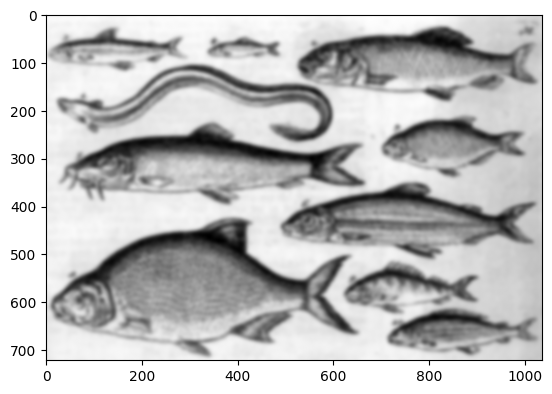

In [46]:
from skimage.filters import gaussian

blurred_img = gaussian(image, sigma=4.0)

plt.imshow(blurred_img);

The intensity of the blur is controlled by the value of `sigma`, the scale of the Gaussian kernel. We can try differnt values of `sigma` to understand its effect:

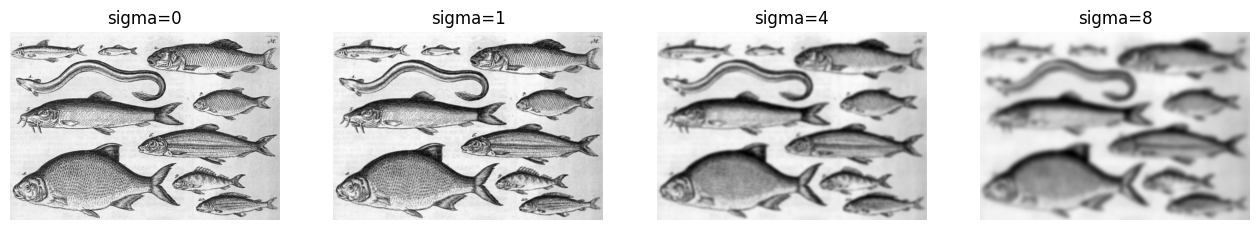

In [20]:
sigmas = [0, 1, 4, 8]

n_sigmas = len(sigmas)

fig, axes = plt.subplots(figsize=(16, 4), ncols=n_sigmas)
for sigma, ax in zip(sigmas, axes):
    blurred_img = gaussian(image, sigma=sigma)
    ax.set_title(f"{sigma=}")
    ax.set_axis_off()
    ax.imshow(blurred_img)
plt.show()

````{admonition} Where to find documentation?

In the code, we can always access a function's documentation using the `help` function (for example: `help(gaussian)`).

It is also useful to search for a function via the Scikit-image <a href="https://scikit-image.org/docs/0.25.x/api/api.html">API reference</a>, which links to usage examples from the Scikit-image <a href="https://scikit-image.org/docs/stable/auto_examples">Gallery</a>.
````

## Thresholding

Thresholding ("binarizing") an image based on pixel values helps us separate the foreground from the background of the image based on intensity values. The result of applying a threshold is a **binary segmentation mask** that can be used to locate, count, or anlayze the size and shape of structures of interest.

To determine a suitable threshold to apply to our image, let's take a look at the histogram of pixel intensity values.

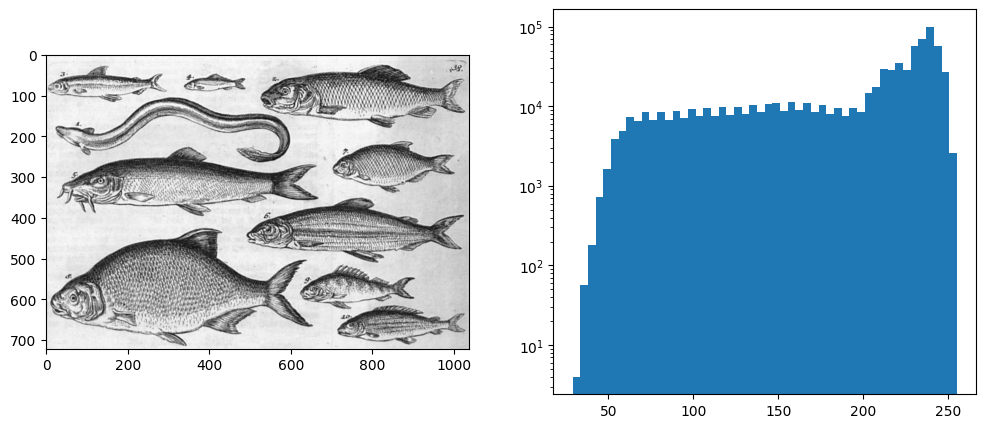

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2)
ax1.imshow(image)
ax2.hist(image.flatten(), bins=50, log=True)
plt.show()

With Numpy, we can effectively create a **boolean mask** from the image array, where pixels satisfying a given condition are set to `True` and other pixels are set to `False`.

In the case of thresholding, this technique involves selecting all pixels greater (or lower) than a given value:

In [22]:
binary_img = image < 200

binary_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(722, 1037))

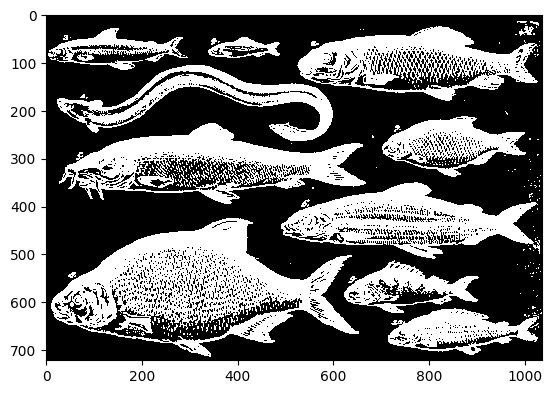

In [23]:
plt.imshow(binary_img, interpolation="none");

````{note} Automatic thresholding

The example above works fine, however we selected our threshold rather arbitrarily. To improve reproducibility, we could use **automatic threshold algorithms** such as <a href="https://en.wikipedia.org/wiki/Otsu's_method">Otsu's method</a> to automatically estimate an appropriate threshold value.

With Scikit-image, you can try:

```
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)

binary_img = image > thresh
```
````

We can further process our binary mask by filling in the morphological "holes" (here, we use an implementation from the <a href="https://docs.scipy.org/doc/scipy/reference/ndimage.html">scipy.ndimage</a> module).

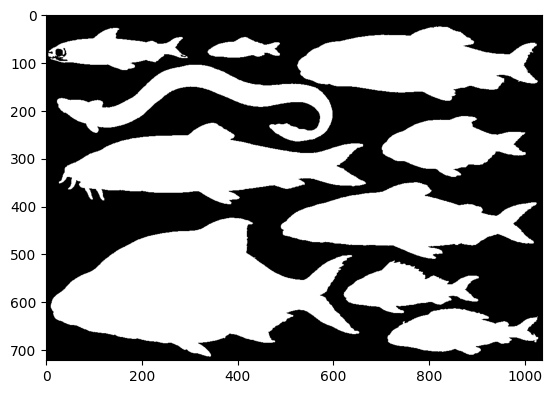

In [47]:
from scipy.ndimage import binary_fill_holes

binary_img = binary_fill_holes(binary_img)

plt.imshow(binary_img);

Let's also remove "small objects", i.e. groups of foreground pixels smaller than a predefined `min_size` value. 

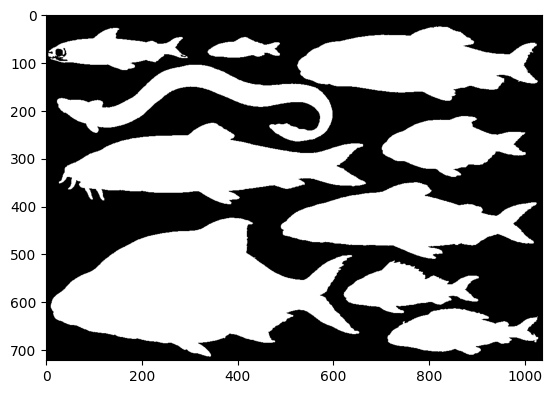

In [48]:
from skimage.morphology import remove_small_objects

binary_img = remove_small_objects(binary_img, min_size=500)

plt.imshow(binary_img);

Our binary mask now seems acceptable. From it, we can calculate, for example, the area fraction of positive pixels:

In [27]:
area_fract = binary_img.sum() / binary_img.size

print("Fraction of `True` pixels: ", area_fract)

Fraction of `True` pixels:  0.4763220669040515


## Analyzing individual objects

To separate individual objects in our binary image, we can apply an algorithm known as **connected components labeling**. This algorithms identifies disconnected groups of pixels and assigns a different *label* value to each of them.

In a "labeled" image array, values respresent object instances (the background is `0` by convention).

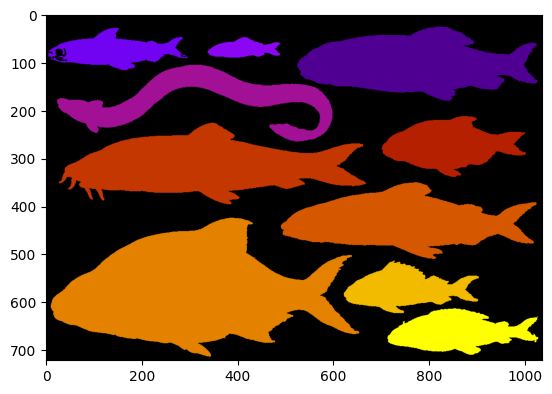

In [28]:
from skimage.measure import label

label_img = label(binary_img)

plt.imshow(label_img, cmap="gnuplot");

Finally, Scikit-image provides functions for measuring object properties (shape and intensity features) in a labeled image.

We can represent the results in a tabular format, such as a <a href="https://pandas.pydata.org/">Pandas DataFrame</a>.

In [29]:
import pandas as pd
from skimage.measure import regionprops_table

measurements = regionprops_table(label_img, intensity_image=image, properties=["label", "area", "centroid", "image_intensity"])

table = pd.DataFrame(measurements)

table.sort_values(by="area", ascending=False, inplace=True)

table

label      area  centroid-0  centroid-1  \
7      8  100630.0  577.246606  308.270993   
5      6   58320.0  316.243347  331.602263   
0      1   47890.0  103.235623  769.130361   
6      7   46364.0  432.454167  745.921232   
3      4   29617.0  178.899956  330.669750   
4      5   21905.0  273.151472  842.068432   
9     10   18376.0  662.674793  859.313289   
8      9   16611.0  572.752273  750.094636   
1      2   12713.0   76.250295  143.563675   
2      3    4203.0   72.445872  412.170830   

                                     image_intensity  
7  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
8  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

Working with a labeled array allows us to select only pixels belonging to a single object. For example:

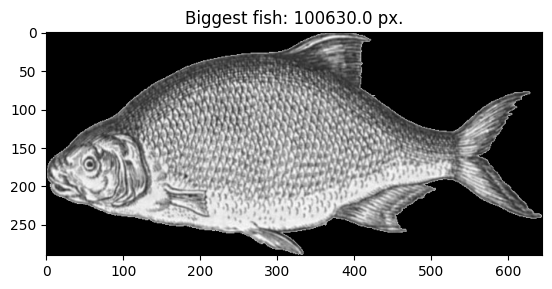

In [30]:
row = table.iloc[0]

plt.imshow(row.image_intensity)
plt.title(f"Biggest fish: {row.area} px.")
plt.show()

Another way of selecting values in an image array is via **filtering**.

Here, we create a binary mask with `True` values in the selected object. We then create a copy of the original image and use our mask to set the pixel values *outside* the mask to zero.

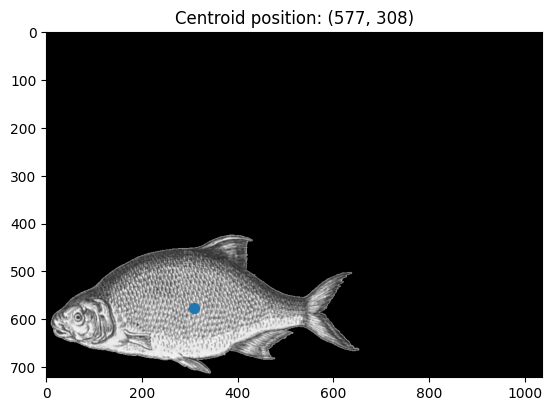

In [50]:
selected_object_mask = label_img == row.label

big_fish_image = image.copy()
big_fish_image[~selected_object_mask] = 0

pos_x = row["centroid-0"]
pos_y = row["centroid-1"]

plt.imshow(img);
plt.title(f"Centroid position: ({pos_x:.0f}, {pos_y:.0f})")
plt.scatter(pos_y, pos_x, s=50)
plt.show()

## Conclusion

In this notebook, we've covered the basics of how to:

- Open images using `imread` and display them using `imshow`.
- Access array **attributes** (`shape`, `dtype`...) and **methods** (`min()`, `max()`...).
- Use **indexing** (`image[10:20, 10:30]`) and **filtering** (`image > 50`) to select and modify pixels from an image array.
- Find and use image processing functions and filters from Scikit-image.
- Generate and work with **binary masks** and **labeled images**.
- Measure and analyze individual **object properties**.

## Where to go next?

We've just scratched the surface of how Python can be used for image analysis. There is much more to learn!

Official documentation pages:

- <a href="https://scikit-image.org/docs/stable/">Scikit-image’s documentation</a>
- <a href="https://numpy.org/doc/2.3/">NumPy documentation</a>
- <a href="https://matplotlib.org/stable/index.html">Matplotlib documentation</a>

From the <a href="https://imaging.epfl.ch/">EPFL Center for Imaging</a>:

- <a href="https://epfl-center-for-imaging.github.io/python-setup/">Setting up Python for scientific image analysis</a> - Our short guide on how to to install, set up, and work with Python on your system.
- <a href="https://github.com/EPFL-Center-for-Imaging/awesome-scientific-image-analysis">Awesome Image Analysis</a> - Our curated list of online learning resources and image analysis tools.